In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [88]:
def generateMap(width, height, pointDist, pointEntre, size):
    
    Map = []
    distribudor = []
    entrega = []
    x = []
    y = []
    dic = {}
    
    di = pointDist
    en = pointEntre
    reduce = di + en
    
    if reduce >= width*height:
        return Map, distribudor, entrega  
    
    Bwidth = np.random.randint(40,70,width)
    Bheight = np.random.randint(40,80,height)
    
    for i in range(width):
        tem = []
        for j in range(height):
            n = random.randint(0,30)
            x.append(sum(Bwidth[:i]))
            y.append(sum(Bheight[:j]))
            tem.append([sum(Bwidth[:i]),sum(Bwidth[:j]), 0])
        Map.append(tem[:])
    
    if size == 's':
        plt.figure(figsize=(150,150))
        
    plt.plot(x, y, 'ro', marker=',', c='b')
    
    while reduce != 0:
        
        xx = random.randint(0,width-1)
        yy = random.randint(0,height-1)
        new = (str(xx)+str(yy))      
                
        if new not in dic:
            dic[new] = 1
            if en == 0 and di == 0:
                reduce = reduce -1
            elif en == 0:
                #Pertenece solamente a un distribudor
                Map[xx][yy][2] = 1
                distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='green')
                di = di - 1
                reduce = reduce -1
            elif di == 0:
                #Pertenece solamente a los almacenes
                Map[xx][yy][2] = 2
                entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='red')
                en = en - 1
                reduce = reduce -1
            else:
                ops = random.randint(0,1)
                if ops == 0:
                    #Pertenece solamente a un distribudor
                    Map[xx][yy][2] = 1
                    distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                    plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='green')
                    di = di - 1
                    reduce = reduce -1
                elif ops == 1:
                    #Pertenece solamente a los almacenes
                    Map[xx][yy][2] = 2
                    entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                    plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='red')
                    en = en - 1
                    reduce = reduce -1
                    
    return Map, distribudor, entrega

In [92]:
matrix, geneDistr, geneEntre = generateMap(1000, 1000, 100, 2500, 's')

In [5]:
def convertEdge(M):
    
    graph = []
    distr = []
    entr = []
    
    w = len(M)
    h = len(M[0])
    node = 0
    for i in range(w):
        for j in range(h):
            y, x, t = M[i][j]
            graph.append([node,x, y, t])
            if t == 1:
                distr.append([node,x,y,t])
            if t == 2:
                entr.append([node,x,y,t])
                
            node += 1
    
    return np.array(graph), distr, entr

In [83]:
def graphNoDirec(M):
    
    graph = []
    edges, dist, entre = convertEdge(M)
    jump = len(M)
    
    for i in range(len(M)):        
        for j in range(len(M[0])):
            tem = []
            
            if j == 0:
                tem.append(edges[(i*jump)+j+1])
            elif j+1 == len(M):
                tem.append(edges[(i*jump)+j-1])
            else:
                tem.append(edges[(i*jump)+j+1])
                tem.append(edges[(i*jump)+j-1])
                
            if i == 0:
                tem.append(edges[(i*jump)+jump+j])
            elif i+1 == len(M):
                tem.append(edges[(i*jump)-jump+j])
            else:
                tem.append(edges[(i*jump)+jump+j])
                tem.append(edges[(i*jump)-jump+j])
            
            graph.append(tem)
    return graph, edges, dist, entre

In [130]:
def bfs(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    while distribucion:
        init, ix, iy, it = distribucion[0]
        pentr = len(entrega)
        dic = {}
        
        n = len(Edges)
        parent = [[None]]*n
        visited = [False]*n

        visited[init] = True
        parent[init] = [init]

        stack = []
        stack.append(init)
        while stack and pentr != 0:
            pos = stack[0]

            for i in range(len(Graph[pos])):
                node, x, y, t = Graph[pos][i]

                if visited[node] == False:
                    lp = parent[pos][:]
                    lp.append(node)
                    parent[node] = lp

                    if t == 2:
                        dic[node] = parent[node]
                        pentr = pentr - 1

                    visited[node] = True
                    stack.append(node)

            stack.pop(0)
        ways.append([init, dic])
        distribucion.pop(0)
    return ways

# Para los nodos con 1 millon
En el caso de los nodos de un millon mostramos todos los caminos posibles para llegar a un punto de entrega, ya que si imprimimos cada camino se nos cuela el programa por la excesiva data.

In [132]:
recorrido = bfs(matrix)
print("ok")

ok


# Ejemplo usando datos pequeños
En esta parte usaremos como funciona nuestra funcion, ya que cuando lo hemos utilizado en datos de un millon se nos colgo el programa.

# En primer lugar, generamos nuestra matrix

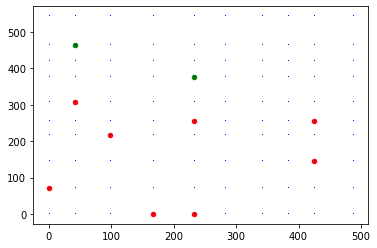

In [120]:
matrix1, geneDistr1, geneEntre1 = generateMap(10, 10, 2, 8, 'n')

# En segundo lugar, asociamos la matriz a un grafo no dirigido

In [121]:
graph, edges, dist, entre= graphNoDirec(matrix1)

# Por ultimo, podremos hacer el recorrido bfs
Para este caso debemos hacer que cada punto de distribucion genere un camino a todos los puntos de entrega. Esta funciona debe ser efectuada en todos los puntos existentes de distribucion.

# Description de la data
En primer lugar, podemos observar que tenemos un arreglo doble. Esto se debe a que solo en el ejemplo inicializamos 2 puntos de distribucion y 8 puntos de entrega. Del primer output tenemos, [18, {15: [18,17,16,15]} ...]. Esto significa que el nodo 18 es un punto de distribucion. Dentro del dictionario se encuentra 15 que es un punto de distribucion y dentro de este diccionario hay un arreglo. Esto significa los nodos que recorre para llegar al nodo 15. 

En este caso pasa de 18 distribucion a 17 esquina a 16 esquina y 15 punto de entrega.

In [131]:
recorrido = bfs(matrix1)
print(np.array(recorrido))

[[18
  {15: [18, 17, 16, 15], 23: [18, 17, 16, 15, 14, 13, 23], 44: [18, 17, 16, 15, 14, 24, 34, 44], 1: [18, 17, 16, 15, 14, 13, 12, 11, 1], 30: [18, 17, 16, 15, 14, 13, 12, 11, 10, 20, 30], 40: [18, 17, 16, 15, 14, 13, 12, 11, 10, 20, 30, 40], 84: [18, 17, 16, 15, 14, 24, 34, 44, 54, 64, 74, 84], 82: [18, 17, 16, 15, 14, 13, 12, 22, 32, 42, 52, 62, 72, 82]}]
 [46
  {44: [46, 45, 44], 15: [46, 45, 35, 25, 15], 23: [46, 45, 44, 43, 33, 23], 40: [46, 45, 44, 43, 42, 41, 40], 84: [46, 45, 44, 54, 64, 74, 84], 30: [46, 45, 44, 43, 42, 41, 40, 30], 82: [46, 45, 44, 43, 42, 52, 62, 72, 82], 1: [46, 45, 44, 43, 42, 41, 31, 21, 11, 1]}]]
